<a href="https://colab.research.google.com/github/ocalzada/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/calzada%2C_oscar_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
# # # TODO - code!

# # # Pseudocode

# # def bayes_theorem(prior, num_iterations, false_positive, false_negative):
# #   probabilities = []
# #   for blah in range(num_iterations):
# #     posterior_probability = #do the bayes awesomeness
# #     probabilities.append(posterior_probability)
# #   return probabilities

def prob_drunk_given_positive(prior, num_iterations, false_positive, true_negative):
  probabilities = []
  for num in range(num_iterations):
    probability_positive_user = prior/(prior + (false_positive*true_negative))
    probabilities.append(probability_positive_user)
  return probabilities



In [0]:

prob_drunk_given_positive(0.001, (3), 0.08, 0.999)

[0.012357884330202669, 0.012357884330202669, 0.012357884330202669]

In [0]:
prob_drunk_given_positive(0.012357884330202669, 3, 0.08, 0.999)

[0.13392032576279944, 0.13392032576279944, 0.13392032576279944]

In [0]:
prob_drunk_given_positive(0.13392032576279944, 5, 0.08, 0.0999)

[0.9436835387127803,
 0.9436835387127803,
 0.9436835387127803,
 0.9436835387127803,
 0.9436835387127803]

In [0]:
prob_drunk_given_positive(0.9436835387127803, 3, 0.008, 0.999)

[0.9916021798660394, 0.9916021798660394, 0.9916021798660394]

In [0]:
# by replacing the 'prior' value with the latest probability of truly being drunk given that
# you get a positive result, within  4 iterations of this test, we were obtaining .99 probability
# you ARE drunk given the positive result.

In [0]:
import scipy.stats
help (scipy.stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

In [0]:
# example from doc above
from scipy import stats
data = [6, 9, 12, 7, 8, 8, 13]
mean, var, std = stats.bayes_mvs(data)
mean

Mean(statistic=9.0, minmax=(7.103650222612533, 10.896349777387467))

In [0]:
var

Variance(statistic=10.0, minmax=(3.1767242068607078, 24.45910382133402))

In [0]:
std

Std_dev(statistic=2.9724954732045084, minmax=(1.7823367265645143, 4.945614605014631))

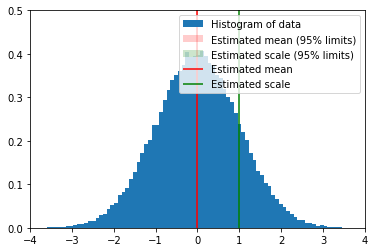

In [0]:
n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r', alpha=0.2, label=r'Estimated mean (95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2, label=r'Estimated scale (95% limits)')
    
ax.legend(fontsize=10)
ax.set_xlim([-4, 4])
ax.set_ylim([0, 0.5])
plt.show()

In [157]:
coinflips_100 = np.random.binomial(n=1, p=.5, size=100)

stats.bayes_mvs(coinflips_100)



(Mean(statistic=0.52, minmax=(0.43662898196255534, 0.6033710180374446)),
 Variance(statistic=0.2573195876288659, minmax=(0.20255593542955683, 0.32396091281978656)),
 Std_dev(statistic=0.5059610993316946, minmax=(0.4500621461860093, 0.5691756432067226)))

In [0]:
bayes_mean, bayes_var, bayes_std = stats.bayes_mvs(coinflips_100)


In [0]:
def confidence_interval(data, confidence_level=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  sample_mean = np.mean(data)
  sample_size = len(data)
  sample_std_dev = np.std(data, ddof=1)
  standard_error = sample_std_dev / (sample_size**.5)
  margin_of_error = standard_error * stats.t.ppf((1 + confidence_level) / 2.0, sample_size - 1)
  return (sample_mean, sample_mean - margin_of_error, sample_mean + margin_of_error)

In [159]:
confidence_interval(coinflips_100)

(0.52, 0.4203691469585294, 0.6196308530414707)

In [0]:
frequentist_confidence = confidence_interval(coinflips_100)

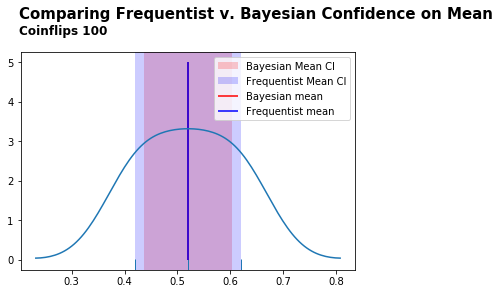

In [178]:
import seaborn as sns


fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(frequentist_confidence, hist=False, rug=True);
ax.vlines(bayes_mean.statistic, 0, 5, colors='r', label='Bayesian mean')
ax.axvspan(bayes_mean.minmax[0],bayes_mean.minmax[1], facecolor='r',
            alpha=0.2, label='Bayesian Mean CI')
ax.vlines(frequentist_confidence[0], 0, 5, colors='b', label='Frequentist mean')
ax.axvspan(frequentist_confidence[1],frequentist_confidence[2], facecolor='b',
            alpha=0.2, label='Frequentist Mean CI')
ax.text(0.20, 6.1, 'Comparing Frequentist v. Bayesian Confidence on Mean', fontsize=15, fontweight='bold')
ax.text(0.20, 5.7, 'Coinflips 100', fontsize=12, fontweight='bold')
ax.legend(loc='upper right');

In [0]:
# When we conduct both a frequentist and a Bayesian analysis on a CoinFlip distribution of sample size 100, 
# what we observe is that while the mean for both samples is the same (i.e. 0.52), the Bayesian Mean Confidence Interval is
# more narrow than the Frequentist Mean Confidence Interval.

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)